In [2]:
import cv2
import glob
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter

In [3]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/puneet6060/intel-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fratzcan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


100%|██████████| 346M/346M [00:03<00:00, 98.4MB/s]


In [4]:
df = pd.DataFrame({})
lists = []
cate = []
dir_name = os.listdir("/content/intel-image-classification/seg_train/seg_train")

for dir_ in dir_name:
    list_ = os.listdir("/content/intel-image-classification/seg_train/seg_train/"+dir_)
    lists = lists+list_
    cate_ = np.tile(dir_,len(list_))
    cate = np.concatenate([cate,cate_])

df["cat"] = cate
df["name"] = lists

In [5]:
df.head()

,cat,name
0,sea,6867.jpg
1,sea,7447.jpg
2,sea,14626.jpg
3,sea,4790.jpg
4,sea,16116.jpg


In [6]:
df.shape[0]

14034

Toplam resim sayısı: 14034


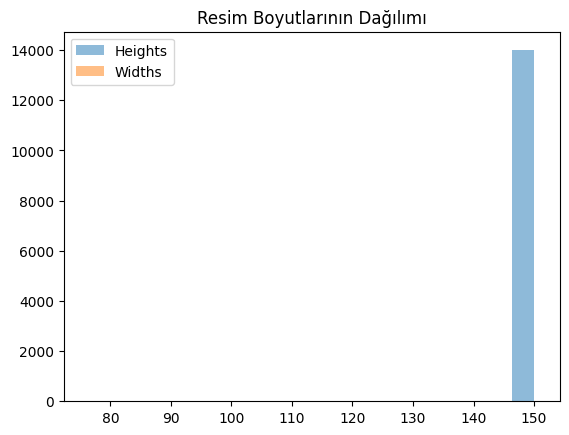

In [34]:
image_paths = glob.glob("/content/intel-image-classification/seg_train/seg_train/**/*.jpg", recursive=True)
print("Toplam resim sayısı:", len(image_paths))

shapes = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        shapes.append(img.shape[:2])

heights = [h for h, w in shapes]
widths = [w for h, w in shapes]

plt.hist(heights, bins=20, alpha=0.5, label="Heights")
plt.hist(widths, bins=20, alpha=0.5, label="Widths")
plt.legend()
plt.title("Resim Boyutlarının Dağılımı")
plt.show()


In [35]:
df["cat"].value_counts()

,count
cat,
mountain,2512
glacier,2404
street,2382
sea,2274
forest,2271
buildings,2191


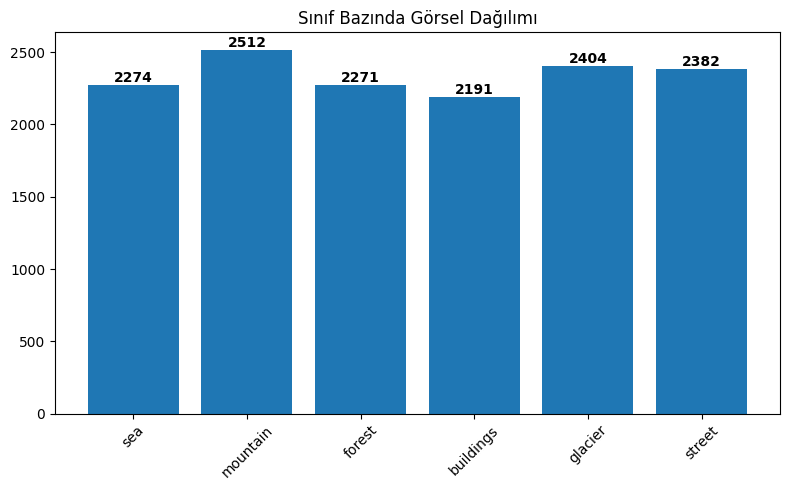

In [36]:
labels = [os.path.basename(os.path.dirname(p)) for p in image_paths]

label_counts = Counter(labels)

plt.figure(figsize=(8,5))
bars = plt.bar(label_counts.keys(), label_counts.values())

plt.title("Sınıf Bazında Görsel Dağılımı")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


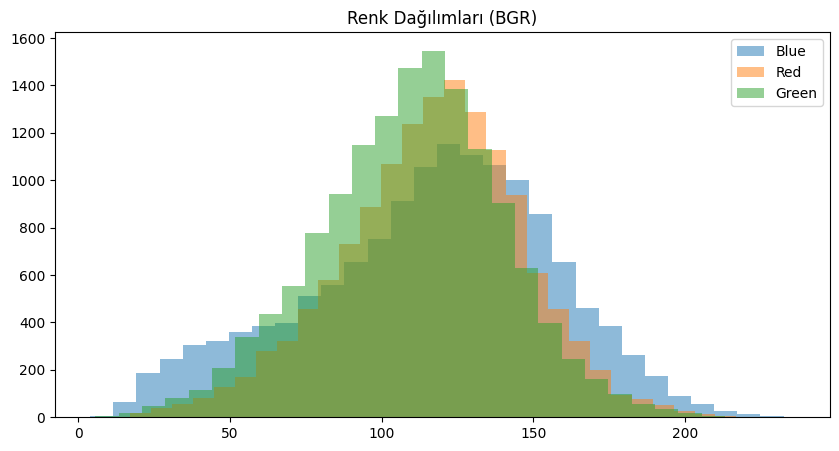

In [9]:
mean_colors = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        mean_colors.append(cv2.mean(img)[:3])

mean_colors = np.array(mean_colors)
plt.figure(figsize=(10,5))
plt.hist(mean_colors[:,0], bins=30, alpha=0.5, label="Blue")
plt.hist(mean_colors[:,1], bins=30, alpha=0.5, label="Red")
plt.hist(mean_colors[:,2], bins=30, alpha=0.5, label="Green")
plt.legend()
plt.title("Renk Dağılımları (BGR)")
plt.show()


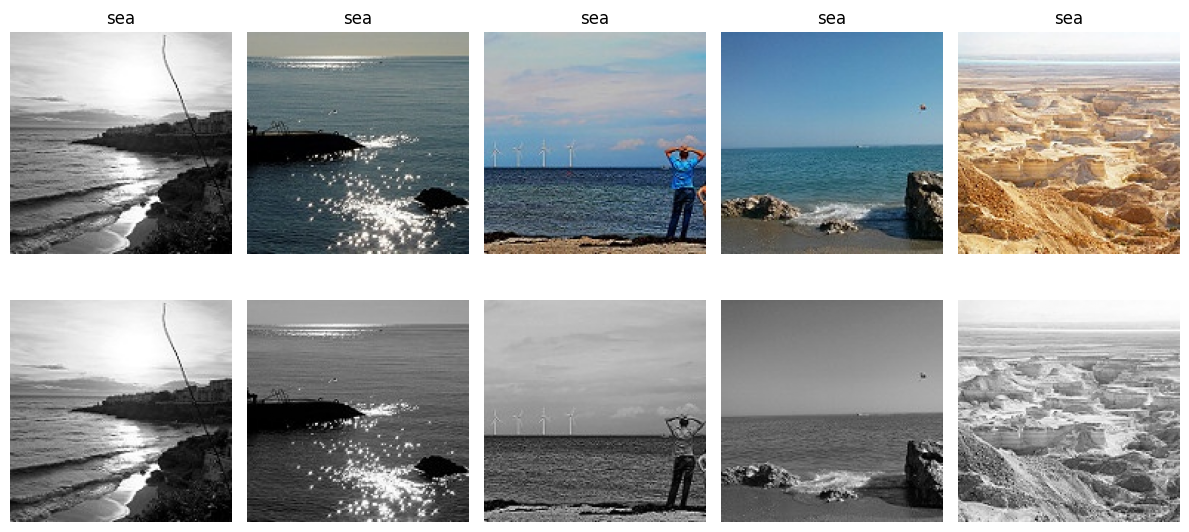

In [27]:
def show_samples(image_paths, n=5):
    plt.figure(figsize=(12,6))
    for i, path in enumerate(image_paths[:n]):
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        plt.subplot(2, n, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), label = "original")
        plt.axis("off")
        plt.title(path.split("/")[-2])

        plt.subplot(2, n, n+i+1)
        plt.imshow(gray, cmap='gray', label = "gray")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_samples(image_paths, n=5)


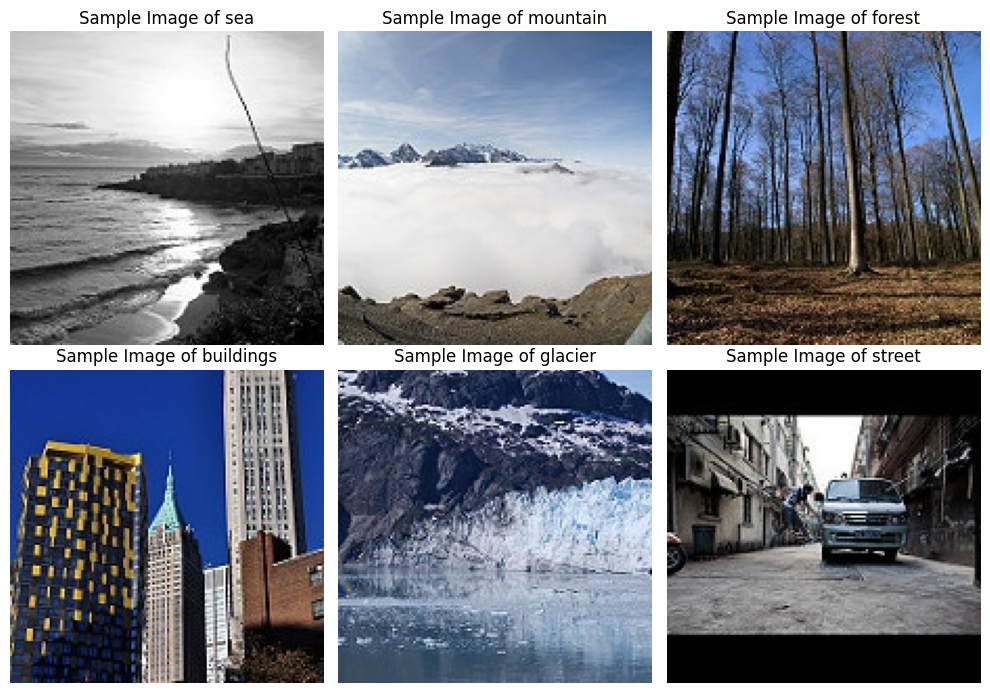

In [38]:
train_data_path = '/content/intel-image-classification/seg_train/seg_train'

def plot_images_opencv(path):
    count = 1
    fig = plt.figure(figsize=(10, 7))

    for i in os.listdir(path):
        f_path = os.path.join(path, i)
        img_path = os.path.join(f_path, os.listdir(f_path)[0])

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB'ye çevir

        fig.add_subplot(2, 3, count)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Sample Image of {i}')
        count += 1

        if count > 6:
            break

    plt.tight_layout()
    plt.show()

plot_images_opencv(train_data_path)
